dataset link = https://use-land-property-data.service.gov.uk/datasets/ocod

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data to csv
data = pd.read_csv('Data_from_gov_uk.csv', low_memory=False)
data

,Title Number,Tenure,Property Address,District,County,Region,Postcode,Multiple Address Indicator,Price Paid,Proprietor Name (1),...,Proprietor (3) Address (3),Proprietor Name (4),Company Registration No. (4),Proprietorship Category (4),Country Incorporated (4),Proprietor (4) Address (1),Proprietor (4) Address (2),Proprietor (4) Address (3),Date Proprietor Added,Additional Proprietor Indicator
0,SF26483,Freehold,"145 Aston Road, Willenhall (WV13 3BY)",WALSALL,WEST MIDLANDS,WEST MIDLANDS,WV13 3BY,N,75000.0,LAKESIDE HOLDINGS LIMITED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-03-2017,N
1,SF41450,Freehold,"82 Ashford Street, Stoke-On-Trent (ST4 2EN)",STOKE-ON-TRENT,STOKE-ON-TRENT,WEST MIDLANDS,ST4 2EN,N,NaN,MRF MANAGING TRUSTEE NO.1 LIMITED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-11-2017,N
2,SF42571,Freehold,"12 Cedar Road, Willenhall (WV13 3BZ)",WALSALL,WEST MIDLANDS,WEST MIDLANDS,WV13 3BZ,N,90000.0,LAKESIDE HOLDINGS LIMITED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-06-2016,N
3,SF52299,Freehold,"62 Beresford Street, Stoke-On-Trent (ST4 2EX)",STOKE-ON-TRENT,STOKE-ON-TRENT,WEST MIDLANDS,ST4 2EX,N,NaN,MRF MANAGING TRUSTEE NO.1 LIMITED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-11-2017,N
4,SF65269,Freehold,"10 Cedar Road, Willenhall (WV13 3BZ)",WALSALL,WEST MIDLANDS,WEST MIDLANDS,WV13 3BZ,N,NaN,LAKESIDE HOLDINGS LIMITED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16-08-2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93343,NGL931690,Leasehold,"Apartment 1, 89 Lancaster Gate, London (W2 3NH)",CITY OF WESTMINSTER,GREATER LONDON,GREATER LONDON,W2 3NH,N,NaN,FORTUNE EVENT LIMITED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-01-2013,N
93344,NGL932064,Leasehold,"Flat B, 48 Berkeley Square, London (W1J 5AX)",CITY OF WESTMINSTER,GREATER LONDON,GREATER LONDON,W1J 5AX,N,2700000.0,PLANETREE HOLDINGS PTE LTD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07-02-2022,N
93345,NGL932291,Leasehold,"Storage Space G3, 55 George Street, London (W1...",CITY OF WESTMINSTER,GREATER LONDON,GREATER LONDON,W1H 5PH,N,NaN,PURE II PROPERTY LIMITED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19-02-2013,N
93346,NGL932294,Leasehold,"Storage Space G1 55 George Street, London (W1H...",CITY OF WESTMINSTER,GREATER LONDON,GREATER LONDON,W1H 5PH,N,NaN,MUMTALKAT INVESTMENT LIMITED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19-02-2013,N


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93348 entries, 0 to 93347
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title Number                     93348 non-null  object 
 1   Tenure                           93348 non-null  object 
 2   Property Address                 93345 non-null  object 
 3   District                         93347 non-null  object 
 4   County                           93347 non-null  object 
 5   Region                           93347 non-null  object 
 6   Postcode                         71427 non-null  object 
 7   Multiple Address Indicator       93347 non-null  object 
 8   Price Paid                       33506 non-null  float64
 9   Proprietor Name (1)              93347 non-null  object 
 10  Company Registration No. (1)     4346 non-null   object 
 11  Proprietorship Category (1)      93347 non-null  object 
 12  Country Incorporat

## Preprocessing

In [4]:
data.columns

Index(['Title Number', 'Tenure', 'Property Address', 'District', 'County',
       'Region', 'Postcode', 'Multiple Address Indicator', 'Price Paid',
       'Proprietor Name (1)', 'Company Registration No. (1)',
       'Proprietorship Category (1)', 'Country Incorporated (1)',
       'Proprietor (1) Address (1)', 'Proprietor (1) Address (2)',
       'Proprietor (1) Address (3)', 'Proprietor Name (2)',
       'Company Registration No. (2)', 'Proprietorship Category (2)',
       'Country Incorporated (2)', 'Proprietor (2) Address (1)',
       'Proprietor (2) Address (2)', 'Proprietor (2) Address (3)',
       'Proprietor Name (3)', 'Company Registration No. (3)',
       'Proprietorship Category (3)', 'Country Incorporated (3)',
       'Proprietor (3) Address (1)', 'Proprietor (3) Address (2)',
       'Proprietor (3) Address (3)', 'Proprietor Name (4)',
       'Company Registration No. (4)', 'Proprietorship Category (4)',
       'Country Incorporated (4)', 'Proprietor (4) Address (1)',
     

In [5]:
# drop unncessary columns, my decision was based on the missing numbers and how effective they are to my algorithm
data.drop([ 'Proprietor (1) Address (2)',
       'Proprietor (1) Address (3)', 'Proprietor Name (2)',
       'Company Registration No. (2)', 'Proprietorship Category (2)',
       'Country Incorporated (2)', 'Proprietor (2) Address (1)',
       'Proprietor (2) Address (2)', 'Proprietor (2) Address (3)',
       'Proprietor Name (3)', 'Company Registration No. (3)',
       'Proprietorship Category (3)', 'Country Incorporated (3)',
       'Proprietor (3) Address (1)', 'Proprietor (3) Address (2)',
       'Proprietor (3) Address (3)', 'Proprietor Name (4)',
       'Company Registration No. (4)', 'Proprietorship Category (4)',
       'Country Incorporated (4)', 'Proprietor (4) Address (1)',
       'Proprietor (4) Address (2)', 'Proprietor (4) Address (3)'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93348 entries, 0 to 93347
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title Number                     93348 non-null  object 
 1   Tenure                           93348 non-null  object 
 2   Property Address                 93345 non-null  object 
 3   District                         93347 non-null  object 
 4   County                           93347 non-null  object 
 5   Region                           93347 non-null  object 
 6   Postcode                         71427 non-null  object 
 7   Multiple Address Indicator       93347 non-null  object 
 8   Price Paid                       33506 non-null  float64
 9   Proprietor Name (1)              93347 non-null  object 
 10  Company Registration No. (1)     4346 non-null   object 
 11  Proprietorship Category (1)      93347 non-null  object 
 12  Country Incorporat

## Preprocessing

In [7]:
data

,Title Number,Tenure,Property Address,District,County,Region,Postcode,Multiple Address Indicator,Price Paid,Proprietor Name (1),Company Registration No. (1),Proprietorship Category (1),Country Incorporated (1),Proprietor (1) Address (1),Date Proprietor Added,Additional Proprietor Indicator
0,SF26483,Freehold,"145 Aston Road, Willenhall (WV13 3BY)",WALSALL,WEST MIDLANDS,WEST MIDLANDS,WV13 3BY,N,75000.0,LAKESIDE HOLDINGS LIMITED,NaN,Limited Company or Public Limited Company,GUERNSEY,"The Anchorage, La Moye Lane, St Martins, Guern...",13-03-2017,N
1,SF41450,Freehold,"82 Ashford Street, Stoke-On-Trent (ST4 2EN)",STOKE-ON-TRENT,STOKE-ON-TRENT,WEST MIDLANDS,ST4 2EN,N,NaN,MRF MANAGING TRUSTEE NO.1 LIMITED,NaN,Limited Company or Public Limited Company,JERSEY,"44 Esplanade, St Helier, Jersey, JE4 9WG",21-11-2017,N
2,SF42571,Freehold,"12 Cedar Road, Willenhall (WV13 3BZ)",WALSALL,WEST MIDLANDS,WEST MIDLANDS,WV13 3BZ,N,90000.0,LAKESIDE HOLDINGS LIMITED,NaN,Limited Company or Public Limited Company,GUERNSEY,"The Anchorage, Le Moye Lane, St Martins, Guern...",13-06-2016,N
3,SF52299,Freehold,"62 Beresford Street, Stoke-On-Trent (ST4 2EX)",STOKE-ON-TRENT,STOKE-ON-TRENT,WEST MIDLANDS,ST4 2EX,N,NaN,MRF MANAGING TRUSTEE NO.1 LIMITED,NaN,Limited Company or Public Limited Company,JERSEY,"44 Esplanade, St Helier, Jersey, JE4 9WG",21-11-2017,N
4,SF65269,Freehold,"10 Cedar Road, Willenhall (WV13 3BZ)",WALSALL,WEST MIDLANDS,WEST MIDLANDS,WV13 3BZ,N,NaN,LAKESIDE HOLDINGS LIMITED,1807,Limited Company or Public Limited Company,GUERNSEY,"The Anchorage, Route De Jerbourg, St Martin , ...",16-08-2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93343,NGL931690,Leasehold,"Apartment 1, 89 Lancaster Gate, London (W2 3NH)",CITY OF WESTMINSTER,GREATER LONDON,GREATER LONDON,W2 3NH,N,NaN,FORTUNE EVENT LIMITED,NaN,Limited Company or Public Limited Company,BRITISH VIRGIN ISLANDS,"PO Box 947, Offshore Incorporations Centre, Ro...",24-01-2013,N
93344,NGL932064,Leasehold,"Flat B, 48 Berkeley Square, London (W1J 5AX)",CITY OF WESTMINSTER,GREATER LONDON,GREATER LONDON,W1J 5AX,N,2700000.0,PLANETREE HOLDINGS PTE LTD,NaN,Limited Company or Public Limited Company,SINGAPORE,"Flat A, 48 Berkeley Square, London W1J 5AX",07-02-2022,N
93345,NGL932291,Leasehold,"Storage Space G3, 55 George Street, London (W1...",CITY OF WESTMINSTER,GREATER LONDON,GREATER LONDON,W1H 5PH,N,NaN,PURE II PROPERTY LIMITED,NaN,Limited Company or Public Limited Company,GUERNSEY,"Anson Court, La Route Des Camps, St Martin, Gu...",19-02-2013,N
93346,NGL932294,Leasehold,"Storage Space G1 55 George Street, London (W1H...",CITY OF WESTMINSTER,GREATER LONDON,GREATER LONDON,W1H 5PH,N,NaN,MUMTALKAT INVESTMENT LIMITED,NaN,Limited Company or Public Limited Company,GUERNSEY,"Anson Court, La Route Des Camps, St Martin, Gu...",19-02-2013,N


In [8]:
# change the dtype of this column to allow future processing
data['Date Proprietor Added'] = pd.to_datetime(data['Date Proprietor Added'], infer_datetime_format=True) 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93348 entries, 0 to 93347
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Title Number                     93348 non-null  object        
 1   Tenure                           93348 non-null  object        
 2   Property Address                 93345 non-null  object        
 3   District                         93347 non-null  object        
 4   County                           93347 non-null  object        
 5   Region                           93347 non-null  object        
 6   Postcode                         71427 non-null  object        
 7   Multiple Address Indicator       93347 non-null  object        
 8   Price Paid                       33506 non-null  float64       
 9   Proprietor Name (1)              93347 non-null  object        
 10  Company Registration No. (1)     4346 non-null   object   

In [10]:
# editing the names of the columns and later dropping the old columns to avoid repetition
data['Proprietor Name'] = data['Proprietor Name (1)']
data['Proprietorship Category'] = data['Proprietorship Category (1)']
data['Country Incorporated'] = data['Country Incorporated (1)']
data['Proprietor Address'] = data['Proprietor (1) Address (1)']

In [11]:
data.drop(['Proprietor Name (1)', 'Company Registration No. (1)',
       'Proprietorship Category (1)', 'Country Incorporated (1)',
       'Proprietor (1) Address (1)'], axis=1, inplace=True)

In [12]:
data['Date'] = data['Date Proprietor Added']

In [13]:
# creating new columns to help separate the data and assist with our algorithm
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day

In [14]:
data.drop('Date Proprietor Added', axis=1, inplace=True)
data.drop('Date', axis=1, inplace=True)

# drop redundant columns

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93348 entries, 0 to 93347
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title Number                     93348 non-null  object 
 1   Tenure                           93348 non-null  object 
 2   Property Address                 93345 non-null  object 
 3   District                         93347 non-null  object 
 4   County                           93347 non-null  object 
 5   Region                           93347 non-null  object 
 6   Postcode                         71427 non-null  object 
 7   Multiple Address Indicator       93347 non-null  object 
 8   Price Paid                       33506 non-null  float64
 9   Additional Proprietor Indicator  93347 non-null  object 
 10  Proprietor Name                  93347 non-null  object 
 11  Proprietorship Category          93347 non-null  object 
 12  Country Incorporat

In [16]:
data.dropna(subset=['Price Paid'], inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33506 entries, 0 to 93344
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title Number                     33506 non-null  object 
 1   Tenure                           33506 non-null  object 
 2   Property Address                 33506 non-null  object 
 3   District                         33506 non-null  object 
 4   County                           33506 non-null  object 
 5   Region                           33506 non-null  object 
 6   Postcode                         31029 non-null  object 
 7   Multiple Address Indicator       33506 non-null  object 
 8   Price Paid                       33506 non-null  float64
 9   Additional Proprietor Indicator  33506 non-null  object 
 10  Proprietor Name                  33506 non-null  object 
 11  Proprietorship Category          33506 non-null  object 
 12  Country Incorporat

In [18]:
data.describe()

,Price Paid,Year,Month,Day
count,3.350600e+04,33485.000000,33485.000000,33485.000000
mean,3.433692e+06,2015.228670,6.451157,15.670808
std,1.321222e+07,5.840977,3.463771,8.735194
min,1.000000e+02,1984.000000,1.000000,1.000000
25%,1.850000e+05,2012.000000,4.000000,8.000000
50%,4.733195e+05,2017.000000,7.000000,16.000000
75%,1.450000e+06,2019.000000,10.000000,23.000000
max,4.485000e+08,2024.000000,12.000000,31.000000


In [19]:
# a more convenient way to fill the missing values in more than one columns
for label, content in data.items():
    if content.isna().sum() != 0:
        if pd.api.types.is_object_dtype(content) or pd.api.types.is_float_dtype(content):
            data[label] = content.fillna(content.mode()[0])

In [20]:
data['Year'] = data['Year'].astype('int64')
data['Month'] = data['Month'].astype('int64')
data['Day'] = data['Day'].astype('int64')

In [21]:
# Standardizing the target column and creating a new column off it
data['log_price'] = np.log(data['Price Paid'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33506 entries, 0 to 93344
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title Number                     33506 non-null  object 
 1   Tenure                           33506 non-null  object 
 2   Property Address                 33506 non-null  object 
 3   District                         33506 non-null  object 
 4   County                           33506 non-null  object 
 5   Region                           33506 non-null  object 
 6   Postcode                         33506 non-null  object 
 7   Multiple Address Indicator       33506 non-null  object 
 8   Price Paid                       33506 non-null  float64
 9   Additional Proprietor Indicator  33506 non-null  object 
 10  Proprietor Name                  33506 non-null  object 
 11  Proprietorship Category          33506 non-null  object 
 12  Country Incorporat

## Visualizations

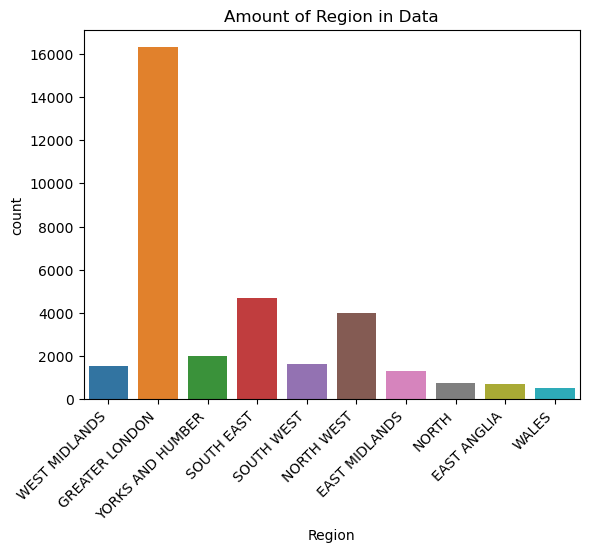

In [23]:
sns.countplot(data=data, x='Region')
plt.title('Amount of Region in Data')
plt.xticks(rotation=45, ha='right');

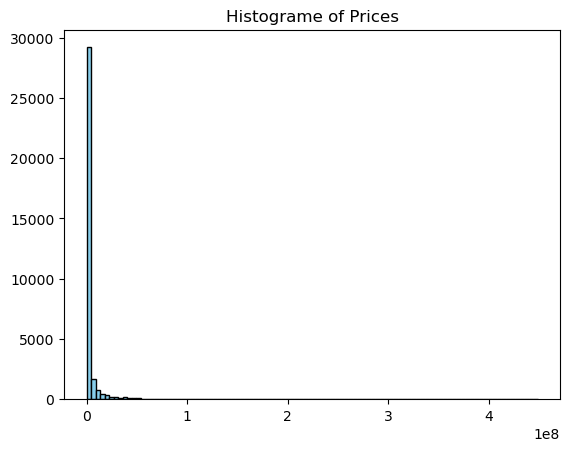

In [24]:
plt.hist(data['Price Paid'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histograme of Prices');

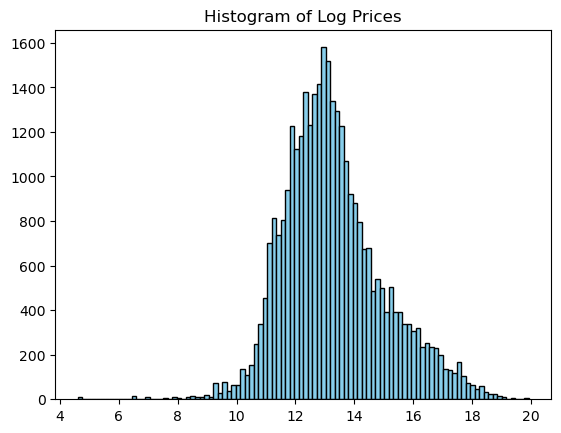

In [25]:
plt.hist(data['log_price'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Log Prices');

<Axes: title={'center': 'Multiple Address Indicator'}, xlabel='Multiple Address Indicator', ylabel='count'>

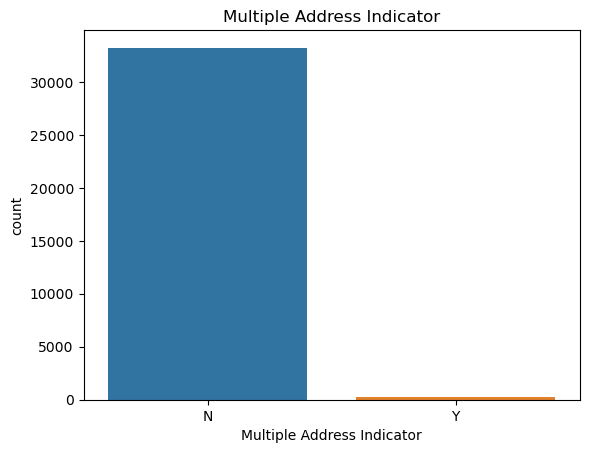

In [26]:
plt.title('Multiple Address Indicator')
sns.countplot(data=data, x='Multiple Address Indicator')

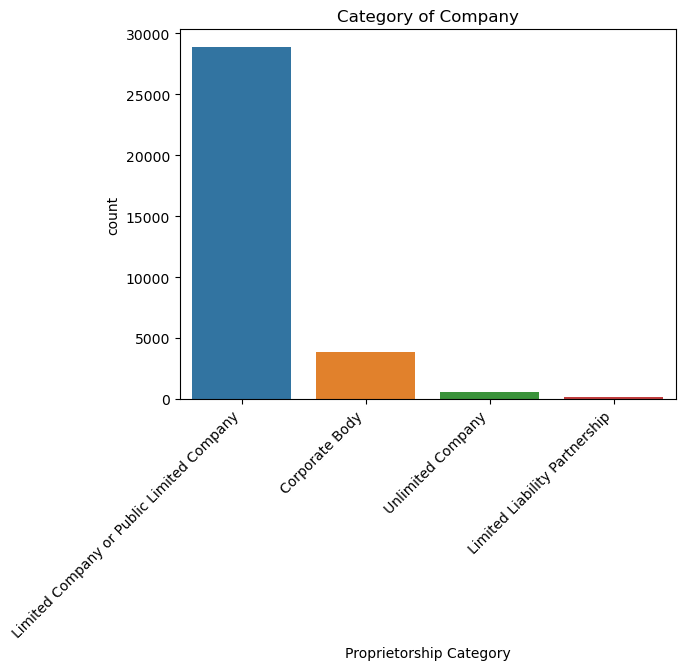

In [27]:
sns.countplot(data=data, x='Proprietorship Category')
plt.title('Category of Company')
plt.xticks(rotation=45, ha='right');

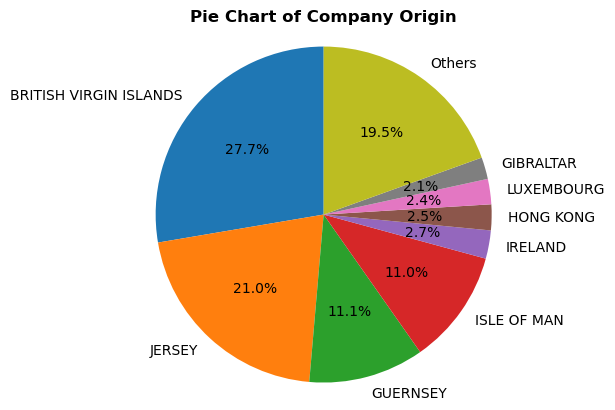

In [28]:
country_counts = data['Country Incorporated'].value_counts()
threshold = 600
sizable_countries = country_counts[country_counts >= threshold]
other_countries = country_counts[country_counts < threshold]
others_count = other_countries.sum()
sizable_countries['Others'] = others_count
plt.pie(sizable_countries, labels=sizable_countries.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart of Company Origin', fontweight='bold')
plt.xticks(rotation=100);

In [74]:
data_corr = data.corr()

<Axes: >

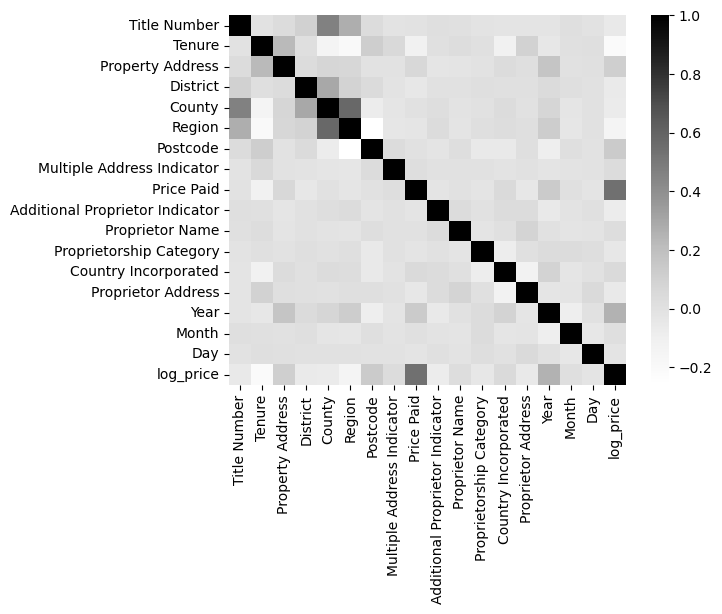

In [78]:
sns.heatmap(data_corr, cmap='Greys')

## Model

In [29]:
from sklearn.preprocessing import LabelEncoder
led = LabelEncoder()

In [30]:
# Encode my features from object type to numeric
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = led.fit_transform(data[i])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33506 entries, 0 to 93344
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title Number                     33506 non-null  int32  
 1   Tenure                           33506 non-null  int32  
 2   Property Address                 33506 non-null  int32  
 3   District                         33506 non-null  int32  
 4   County                           33506 non-null  int32  
 5   Region                           33506 non-null  int32  
 6   Postcode                         33506 non-null  int32  
 7   Multiple Address Indicator       33506 non-null  int32  
 8   Price Paid                       33506 non-null  float64
 9   Additional Proprietor Indicator  33506 non-null  int32  
 10  Proprietor Name                  33506 non-null  int32  
 11  Proprietorship Category          33506 non-null  int32  
 12  Country Incorporat

In [32]:
# import libraries for model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = data.drop(['Price Paid', 'log_price'], axis=1)
y = data['Price Paid']

In [33]:
#scale my features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_log = data['log_price']

In [34]:
# train test split with normal features and target
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

In [35]:
# train test split with scaled features and log target
X_train_scaled, X_test_scaled, y_train_log, y_test_log = train_test_split(X_scaled, y_log, train_size=0.8, random_state=42)

#### Ada Boost Regressor

In [36]:
from sklearn.ensemble import AdaBoostRegressor

In [37]:
%%time

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada.score(X_test, y_test)

CPU times: total: 2.33 s
Wall time: 2.4 s


-1.2680756711883796

In [38]:
%%time
ada.fit(X_train_scaled, y_train_log)
ada.score(X_test_scaled, y_test_log)

CPU times: total: 4.3 s
Wall time: 4.57 s


0.19550000258943967

In [39]:
%%time

from sklearn.model_selection import RandomizedSearchCV
ada_tuned = AdaBoostRegressor()
ada_param_grid  = {
    'estimator': [None],
    'n_estimators': np.random.randint(50, 501, size=50),
    'learning_rate': np.random.uniform(0.01, 2.0, size=50), 
    'loss': ['linear', 'square', 'exponential']  
}

ada_search = RandomizedSearchCV(estimator=ada_tuned, 
                                   param_distributions=ada_param_grid,
                                   n_iter=50,             
                                   scoring='neg_mean_squared_error', 
                                   cv=5,                
                                   random_state=42)
ada_search.fit(X_train_scaled, y_train_log)

CPU times: total: 38min 54s
Wall time: 42min 22s


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=50,
                   param_distributions={'estimator': [None],
                                        'learning_rate': array([0.27856774, 1.24954404, 1.09597292, 0.36625676, 1.90822354,
       0.94233786, 1.66235063, 1.65120085, 0.77166125, 0.30136946,
       1.63753843, 1.10109567, 0.44441814, 0.02087621, 1.5381561 ,
       1.71246068, 1.42390224, 1.41694352, 0.83261964, 0.04415875,
       1.15...
       0.53448917, 1.89671681, 1.45595469, 1.34136532, 1.85274064]),
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': array([336, 400, 255, 113, 145, 274, 456, 231, 269,  83, 211, 157, 107,
       144, 107, 349, 483, 304, 422, 295, 165,  52, 291, 232, 462, 222,
       473, 104, 209, 425, 102, 360, 189, 406,  75, 437, 484, 247, 223,
       352, 418, 330, 346, 177, 327, 103, 143, 235, 125, 345])},
                   random_state=42, scoring='neg_mean_squared_error')

In [40]:
# After tuning, extract the best hyper-parameters to train data on
ada_best_params = ada_search.best_params_
ada_best_params

{'n_estimators': 75,
 'loss': 'linear',
 'learning_rate': 0.1123740277571924,
 'estimator': None}

In [42]:
ada_best = AdaBoostRegressor(n_estimators= 75, loss='linear', 
                             learning_rate=0.1123740277571924,
                             estimator= None)
ada_best.fit(X_train_scaled, y_train_log)
ada_best.score(X_test_scaled, y_test_log)

0.23875779128148678

In [43]:
ada_preds = ada_best.predict(X_test_scaled)

####  XGBoost Model

In [45]:
import xgboost as xgb

In [48]:
%%time
model = xgb.XGBRegressor(objective='reg:squarederror',  
    n_estimators=100,              
    max_depth=6,                   
    learning_rate=0.1,             
    subsample=0.8,                 
    colsample_bytree=0.8,          
    random_state=42)
model.fit(X_train, y_train)

CPU times: total: 9.42 s
Wall time: 2.69 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [49]:
model.score(X_test, y_test)

0.2041174410918507

In [50]:
model.fit(X_train_scaled, y_train_log)
model.score(X_test_scaled, y_test_log)

0.5653516650339877

In [52]:
%%time
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42)
xgb_search.fit(X_train_scaled, y_train_log)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 1h 23min 14s
Wall time: 22min 32s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
                                        'reg_lambda': [0, 0.001, 0.01, 0.1, 1],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [53]:
# pick the best model that fits my dataset
xgbbest_model = xgb_search.best_estimator_

In [56]:
xgbbest_model.fit(X_train_scaled, y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=1, reg_lambda=1, ...)

In [57]:
xgbbest_model.score(X_test_scaled, y_test_log)

0.6540678366007031

In [59]:
xgb_preds = xgbbest_model.predict(X_test_scaled)

## Scoring Metrics

In [68]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Regression metrics

ada_mse = mean_squared_error(y_test_log, ada_preds)
ada_r2 = r2_score(y_test_log, ada_preds)
ada_mae = mean_absolute_error(y_test_log, ada_preds)
ada_rmse = np.sqrt(mean_squared_error(y_test_log, ada_preds))

xgb_mse = mean_squared_error(y_test_log, xgb_preds)
xgb_r2 = r2_score(y_test_log, xgb_preds)
xgb_mae = mean_absolute_error(y_test_log, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test_log, xgb_preds))


models = ['Ada Boost', 'XGBoost']
mse_values = [ada_mse, xgb_mse]
r2_values = [ada_r2, xgb_r2]
mae_values = [ada_mae, xgb_mae]
rmse_values = [ada_rmse, xgb_rmse]

In [69]:
# Metrics turned to dataframe
metrics = pd.DataFrame({
    'Model': ['Ada Boost', 'XGBoost'],
    'MSE': [ada_mse, xgb_mse],
    'MAE': [ada_mae, xgb_mae],
    'RMSE': [ada_rmse, xgb_rmse],
    'R-squared': [ada_r2, xgb_r2]
})

metrics

,Model,MSE,MAE,RMSE,R-squared
0,Ada Boost,2.221264,1.117335,1.490391,0.238758
1,XGBoost,1.009412,0.670280,1.004695,0.654068


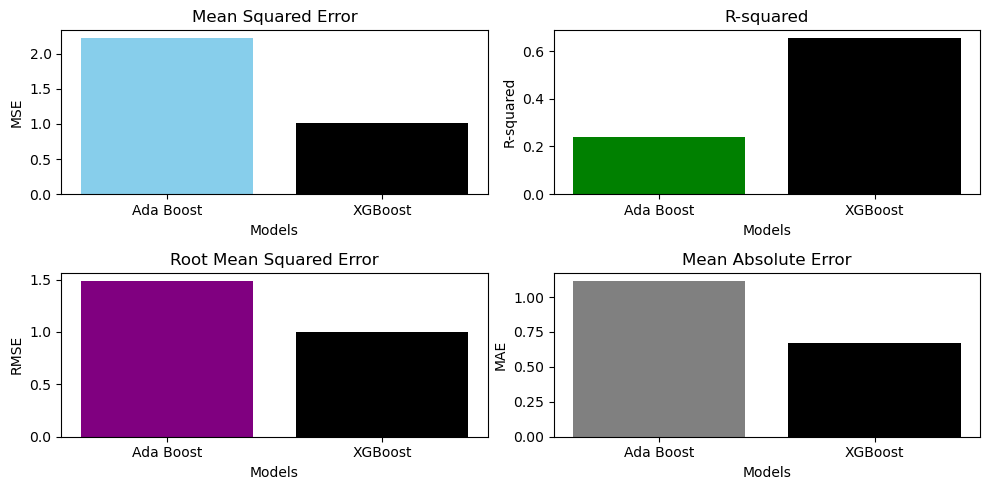

In [73]:
# Visualizations of metrics.
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.bar(models, mse_values, color=['skyblue', 'black'])
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error')

plt.subplot(2, 2, 2)
plt.bar(models, r2_values, color=['green', 'black'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared')

plt.subplot(2, 2, 3)
plt.bar(models, rmse_values, color=['purple', 'black'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error')

plt.subplot(2, 2, 4)
plt.bar(models, mae_values, color=['grey', 'black'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')

plt.tight_layout()
plt.show()

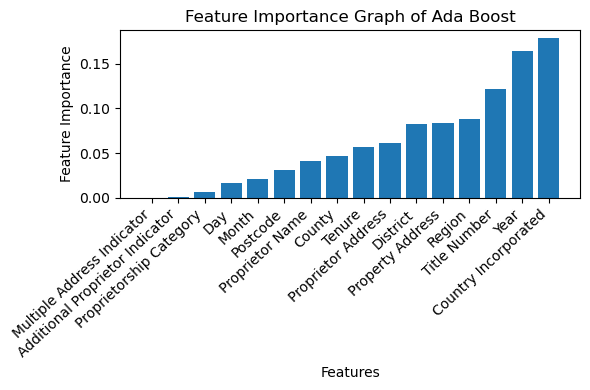

In [82]:
ada_feat = ada_best.feature_importances_
feature = pd.DataFrame({'feature':X.columns, 'Importance':ada_feat})
feature = feature.sort_values(by='Importance')

plt.figure(figsize=(6,4))
plt.bar(feature.feature, feature.Importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Graph of Ada Boost')
plt.xticks(rotation=43, ha='right')
plt.tight_layout()
plt.show()

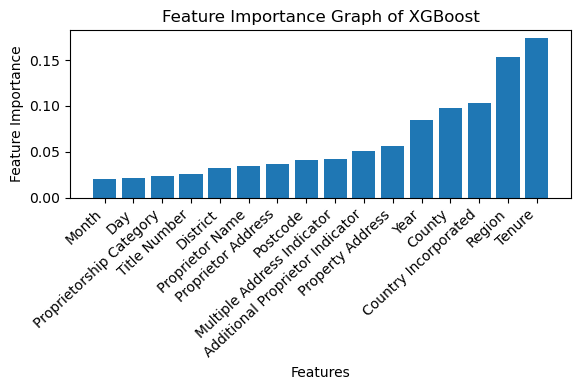

In [81]:
xgb_feat = xgbbest_model.feature_importances_
feature = pd.DataFrame({'feature':X.columns, 'Importance':xgb_feat})
feature = feature.sort_values(by='Importance')

plt.figure(figsize=(6,4))
plt.bar(feature.feature, feature.Importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Graph of XGBoost')
plt.xticks(rotation=43, ha='right')
plt.tight_layout()
plt.show()